In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Vitualization
import seaborn as sns

# transformation
import scipy

import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# data prepossessing, PCA , kmean and Hierarchy dependencies
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
# load dataset
Train_data = pd.read_csv("ML/application_train.csv")
"""Test_data = pd.read_csv("ML/application_test.csv")
Bureau_data = pd.read_csv("ML/bureau_balance.csv")
creditcard_data = pd.read_csv("ML/credit_card_balance.csv")
POS_data = pd.read_csv("ML/POS_CASH_balance.csv")"""

'Test_data = pd.read_csv("ML/application_test.csv")\nBureau_data = pd.read_csv("ML/bureau_balance.csv")\ncreditcard_data = pd.read_csv("ML/credit_card_balance.csv")\nPOS_data = pd.read_csv("ML/POS_CASH_balance.csv")'

In [3]:
# view application train dataset
Train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# explore the data column type distribution
Train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [5]:
# explore column stat for object type for application_train_data
Train_data.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Pre-proceesing of Data. These involved removing missing values, converting categorical data to numerical and tranforming the data to the form we can  model PCA, kmean and agglomerate clustring

In [6]:
# drop missing data
Train_data = Train_data.dropna()

In [7]:
Train_data.head(0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [8]:
# transform categorical data to numerical
object_cols = list(Train_data.select_dtypes('object').columns)
for i in object_cols:
    Train_data[i] = LabelEncoder().fit_transform(Train_data[i])
Train_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [9]:
# droping the target column
labels = Train_data["TARGET"]
Train_data = Train_data.drop('TARGET', axis= 1)

In [10]:
Train_data['DAYS_BIRTH'] = Train_data['DAYS_BIRTH']/-365
Train_data['DAYS_ID_PUBLISH'] = Train_data['DAYS_ID_PUBLISH']/-365
Train_data['DAYS_LAST_PHONE_CHANGE']= Train_data['DAYS_LAST_PHONE_CHANGE']/-365

### creating PCA model for all the 121 columns and determine top ten principal component

In [11]:
# Standarize data with StandarScaler
X_Train = Train_data.copy()

X_Train_scaled = StandardScaler().fit_transform(X_Train)
print(X_Train_scaled[0:5])

[[-1.73350287e+00 -3.50680055e-01  9.81569487e-01  0.00000000e+00
   6.73812280e-01 -7.77502093e-01 -8.44145144e-01 -2.71831198e-01
  -4.29505676e-01 -3.96693845e-01  4.04163648e-01  8.05236964e-01
   9.10415360e-01 -3.25477909e-01 -3.05447328e-01 -8.48743085e-01
   3.73423029e-01  6.77444422e-01  1.27719865e+00  7.91728548e-01
   8.68819704e-01  0.00000000e+00  1.52498570e-02 -5.17310144e-01
   5.61131718e-02 -6.69256597e-01 -3.79118566e-01  1.22001138e-01
  -4.29472320e-01 -8.64202507e-03  9.45599655e-02 -9.61906616e-01
   1.72912035e+00 -1.17934447e-01 -2.51832203e-01 -2.35224646e-01
  -1.96565537e-01 -4.17149759e-01 -3.92639921e-01 -9.74159163e-01
  -1.09884263e+00  8.95287566e-01  5.25318219e-01  1.50599595e-01
   4.54307229e-01  2.54446378e-01  3.97862050e-01  8.00571287e-01
  -3.41089865e-01 -1.22798484e+00  5.70057615e-01  8.15348024e-01
  -8.20275620e-01  1.51425992e-01 -2.42610843e-01 -1.86433665e-01
  -4.06342837e-01  2.16632945e-01  5.32579682e-01  1.52722068e-01
   4.17563

In [12]:
# creating PCA class with c_component of ten
pca = PCA(n_components= 10)
top_10_comp = pca.fit_transform(X_Train_scaled)
#Obtain the  variants ratio of the first ten principal components
pca.explained_variance_ratio_

array([0.16937962, 0.04872369, 0.03547286, 0.0285409 , 0.02618908,
       0.02470114, 0.02099288, 0.01917679, 0.01883505, 0.01751672])

In [13]:
# estimate the total amount of variance preserved at top to dimention
pca.explained_variance_ratio_.sum()

0.40952873029874715

In [14]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data= top_10_comp, columns=["principal component 1", "principal component 2","principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7",
                                "principal component 8", "principal component 9", "principal component 10"]
)
df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.257954,-1.525992,-1.548615,-0.068458,0.670567,1.885135,2.599570,-0.703127,0.142199,-0.407641
1,-1.573347,1.730250,-0.743942,-0.287990,-0.263246,1.289825,1.328066,-1.475894,-0.974776,1.255172
2,24.055994,-0.114295,1.947566,14.795783,-1.944870,0.370430,-1.500918,-1.388502,-1.245979,-5.534111
3,8.795450,1.569791,-1.811170,-2.503641,0.032077,0.838397,0.778171,1.076032,2.316590,3.590933
4,8.090499,-4.210708,1.576563,-0.529943,3.988615,-2.135037,2.252722,0.458013,2.022012,-3.445924


# We observed that , about 40% of the obserevd variance was preserved

<IPython.core.display.Javascript object>


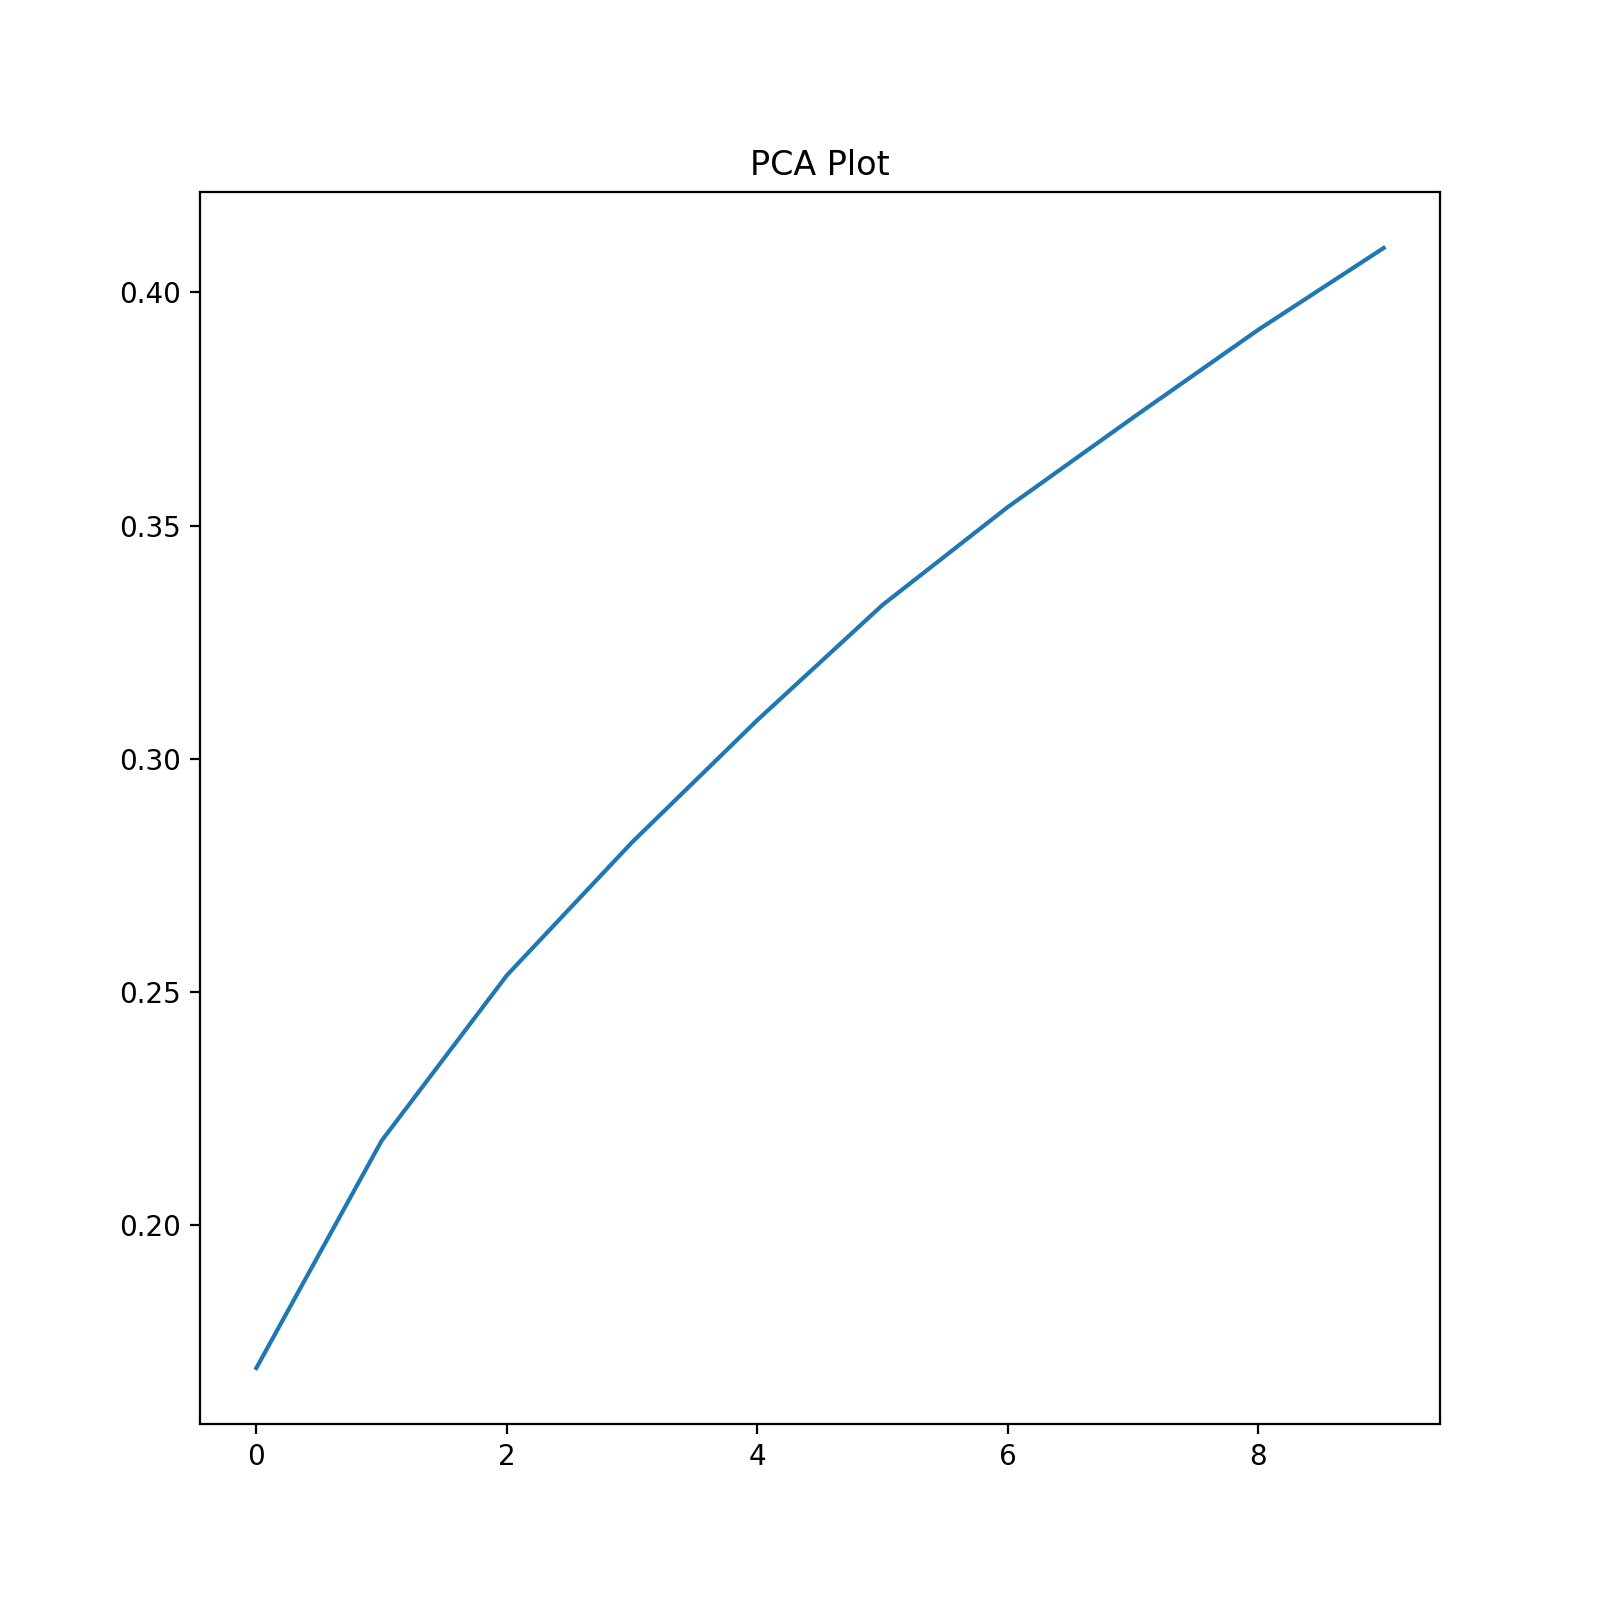

In [15]:
# vitualizing the top ten PCA 
T10D = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,8))
plt.plot(T10D)
plt.title("PCA Plot")
plt.show()

### choosing the right dimention for these dataset that will preserved 95% of the variance

In [16]:
pca = PCA()
pca.fit(X_Train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

<IPython.core.display.Javascript object>


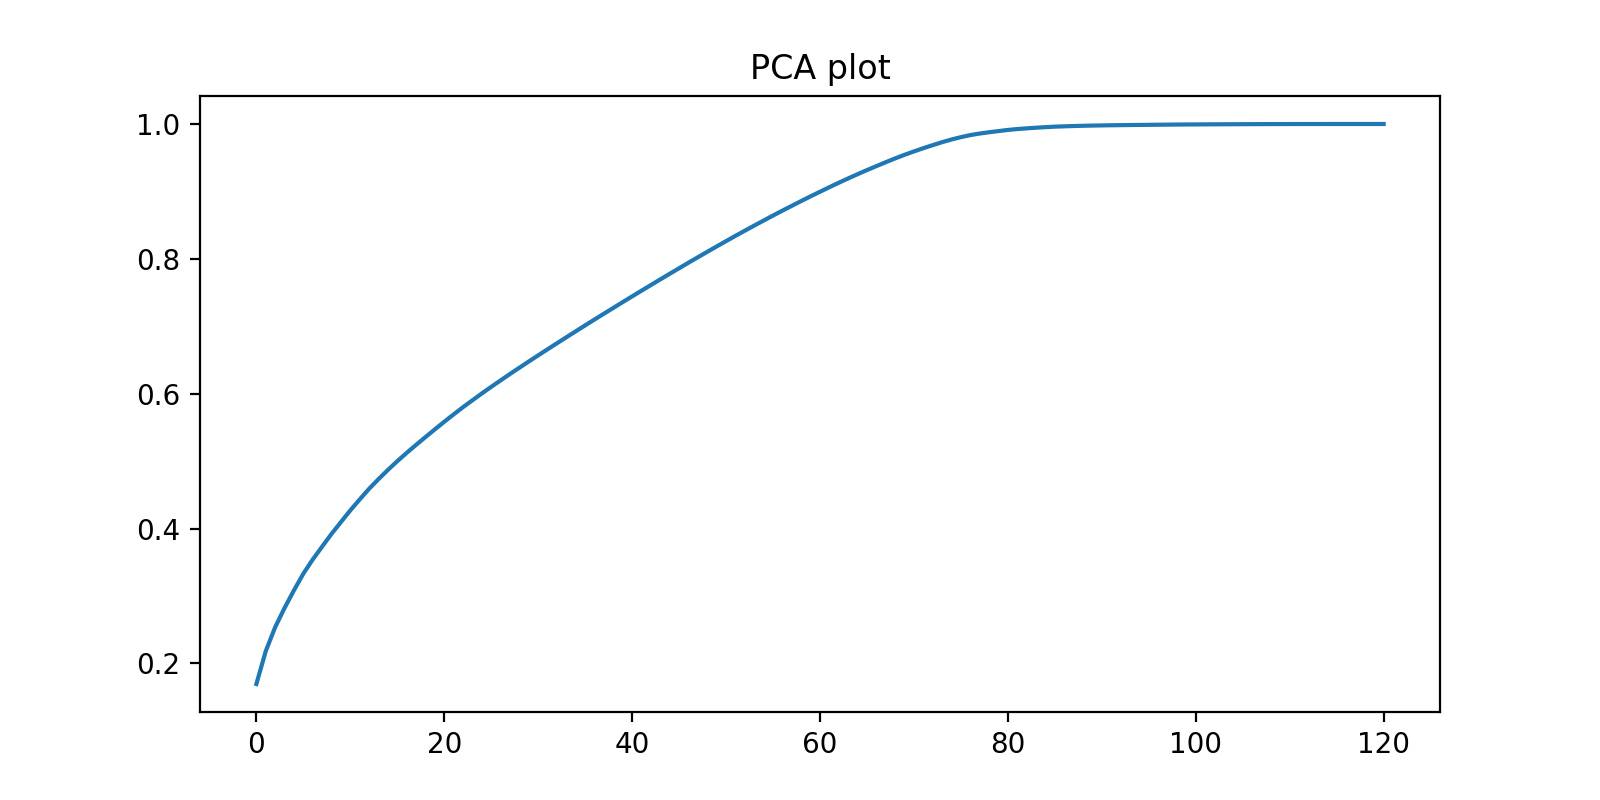

In [17]:
# Elbow curve
plt.figure(figsize=(8,4))
plt.plot(cumsum)
plt.title("PCA plot")
plt.show()

##### PCA virtualization/analysis reveal that this dataset is highly dense. As the dimention could not be reduced to very small amount and still preserved important informationn about the data. To achieve a good dimentionality reduction , the dimention can only be reduced to half. i.e from 121 to 60

###  

#### Use hierarchical clustering to visualize the tree and determine the best “cut”

In [18]:
X_train = X_Train.copy()

In [19]:
# Normalize the data
normalized = normalize(X_train)

In [20]:
# Create a new dataframe with the normalized data
X_train2 = pd.DataFrame(normalized)

In [21]:
X_train2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.133124,0.0,0.000001,0.0,0.000001,0.000000,0.137669,0.763003,0.032502,0.616517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004
1,0.251530,0.0,0.000000,0.0,0.000003,0.000003,0.508610,0.654852,0.042169,0.497307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008


In [22]:
# matching the column headings
X_train2.columns = X_train.columns
X_train2.head(2)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.133124,0.0,0.000001,0.0,0.000001,0.000000,0.137669,0.763003,0.032502,0.616517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004
1,0.251530,0.0,0.000000,0.0,0.000003,0.000003,0.508610,0.654852,0.042169,0.497307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000008


In [23]:
# Perform hierarchical clustering
mergings = linkage(X_train2, method='ward')

<IPython.core.display.Javascript object>


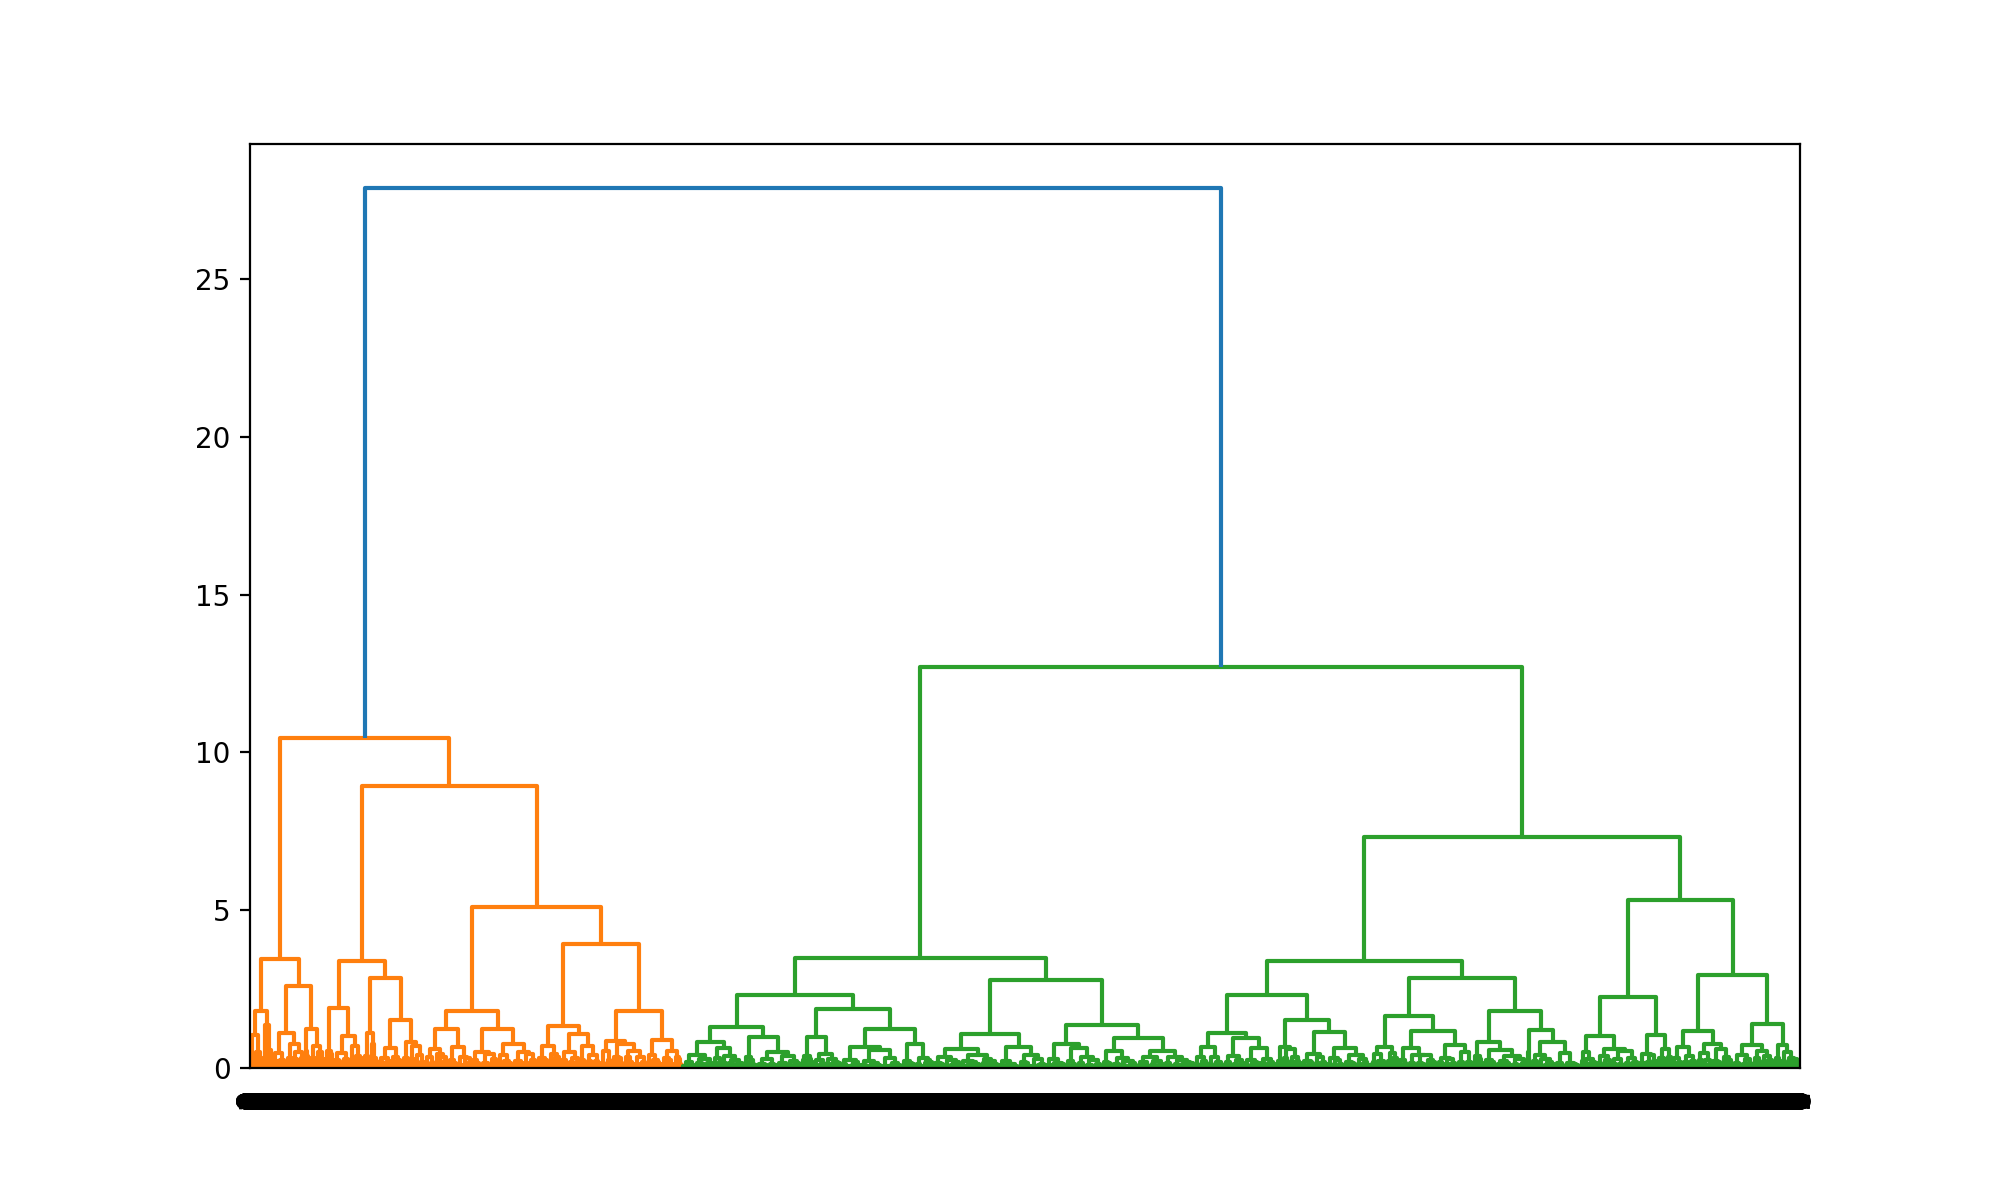

In [24]:
# Generate a dendrogram
plt.figure(figsize=(10,6))
dendrogram(mergings,
          labels=np.array(labels),
          leaf_rotation=90,
          leaf_font_size=12)
plt.show()

In [25]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,
                               affinity='euclidean',
                               linkage='ward')

In [26]:
model = model.fit_predict(X_train2)

In [27]:
model

array([2, 1, 2, ..., 1, 0, 0])

In [28]:
#cluster_labels = model.labels_
X_train2["Hcluster"] = model
X_train2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Hcluster
0,0.133124,0.0,1.330135e-06,0.0,0.000001,0.000000e+00,0.137669,0.763003,0.032502,0.616517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.990404e-06,2
1,0.251530,0.0,0.000000e+00,0.0,0.000003,2.511654e-06,0.508610,0.654852,0.042169,0.497307,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7.534962e-06,1
2,0.101972,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.206124,0.687082,0.054284,0.687082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,4.071594e-06,2
3,0.247909,0.0,2.474390e-06,0.0,0.000000,0.000000e+00,0.400851,0.652463,0.061319,0.590142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7.423169e-06,1
4,0.076934,0.0,7.670773e-07,0.0,0.000000,7.670773e-07,0.172592,0.781809,0.023804,0.593718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,7.670773e-07,2


<IPython.core.display.Javascript object>


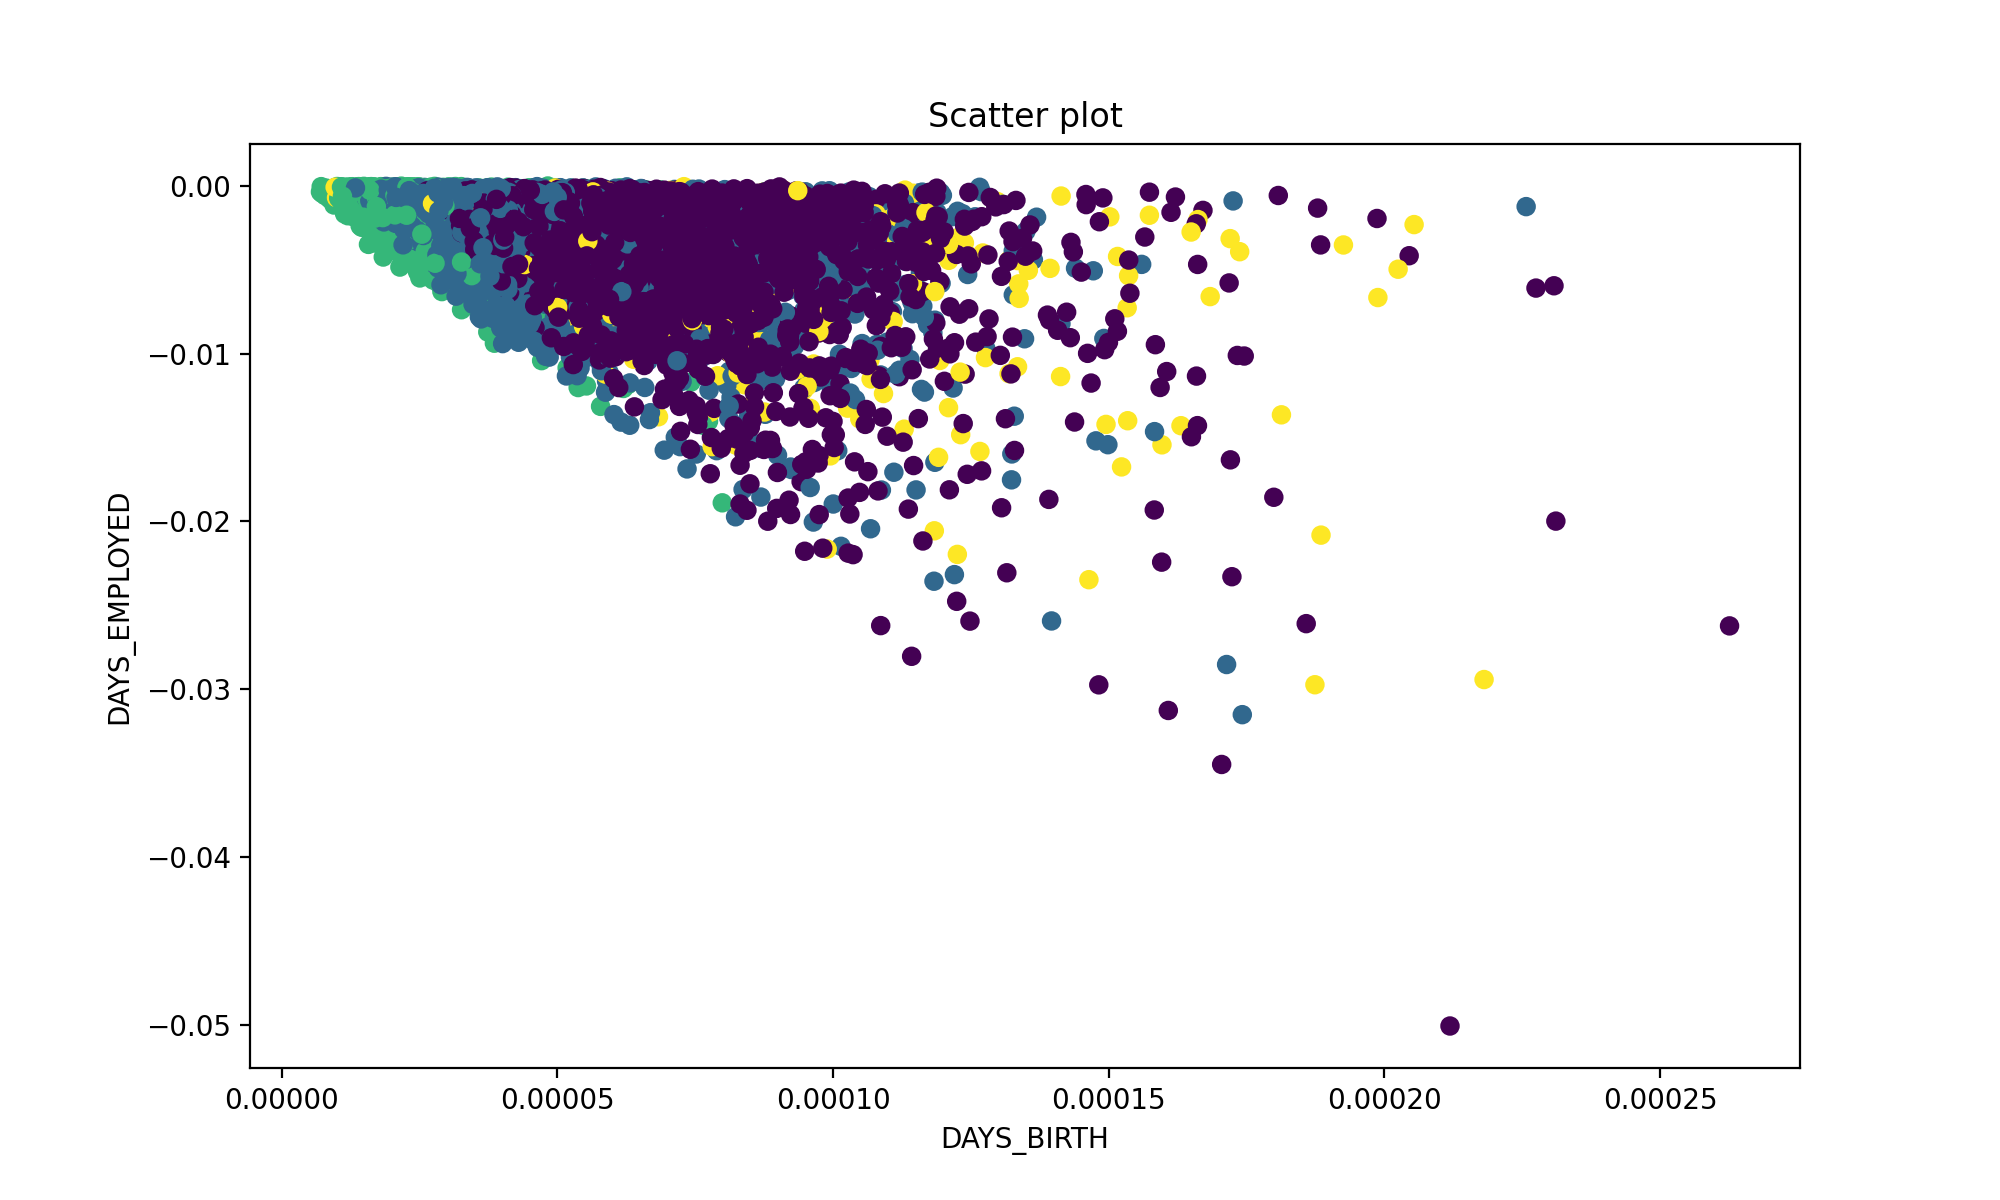

In [48]:
# Create a scatter plot with two of the features
plt.figure(figsize=(10,6))
plt.scatter(X_train2['DAYS_BIRTH'], X_train2['DAYS_EMPLOYED'], c = X_train2['Hcluster'])
plt.xlabel('DAYS_BIRTH')
plt.ylabel('DAYS_EMPLOYED')
plt.title('Scatter plot')
plt.show()

#### Performing Kmean clustring

In [55]:
X_train = X_Train.copy()

In [56]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_train_scaled

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.76470588e-01],
       [1.74087375e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.76470588e-01],
       [2.69554645e-04, 0.00000000e+00, 0.00000000e+00, ...,
        6.25000000e-02, 0.00000000e+00, 2.35294118e-01],
       ...,
       [9.99758524e-01, 0.00000000e+00, 0.00000000e+00, ...,
        6.25000000e-02, 0.00000000e+00, 5.88235294e-02],
       [9.99912956e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.76470588e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.88235294e-02]])

<IPython.core.display.Javascript object>


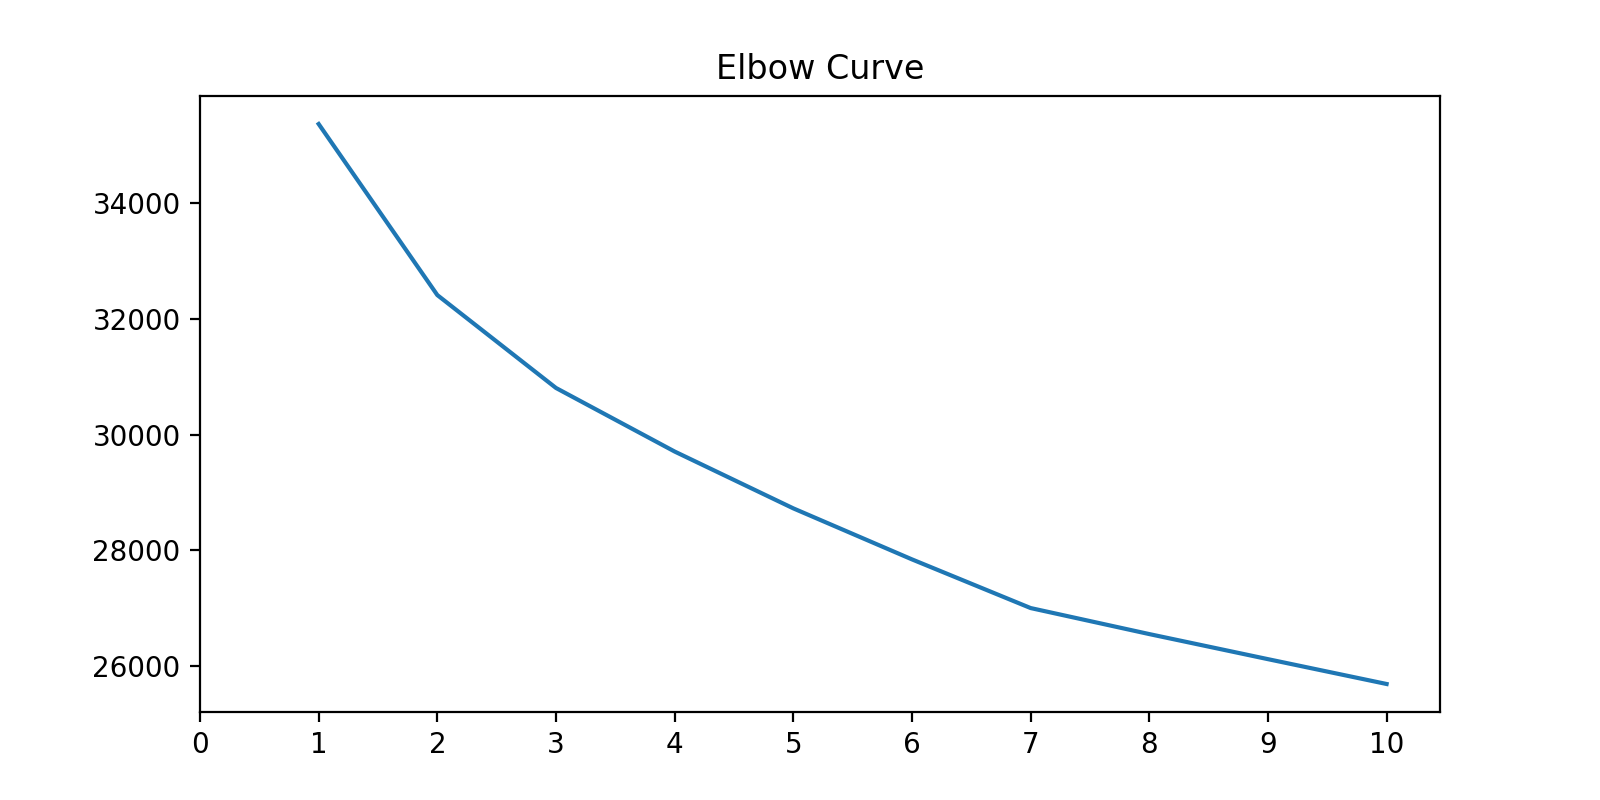

In [57]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_train_scaled)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.figure(figsize=(8,4))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.show()

In [58]:
# Predicting clusters with k=7

# Initialize the k-means model
model = KMeans(n_clusters=7, random_state=0)

# Fit the model
model.fit(X_train_scaled)

# Predict clusters
predictions = model.predict(X_train_scaled)

#X_train_scaled['kcluster'] = predictions
#X_train_scaled.head()
#df_y = pd.DataFrame(predictions, columns=['Cluster'])
#combined = X_train_scaled.join(df_y, how='inner')
#combined.head()



In [59]:
X_train['kcluster'] = predictions
X_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,kcluster
71,100083,0,1,0,1,0,103500.0,573628.5,24435.0,463500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,5
124,100145,0,0,0,1,1,202500.0,260725.5,16789.5,198000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,3
152,100179,0,0,0,0,0,202500.0,675000.0,53329.5,675000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0,2
161,100190,0,1,0,0,0,162000.0,263686.5,24781.5,238500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2
255,100295,0,1,0,0,1,225000.0,1019205.0,31032.0,774000.0,...,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0,2


<IPython.core.display.Javascript object>


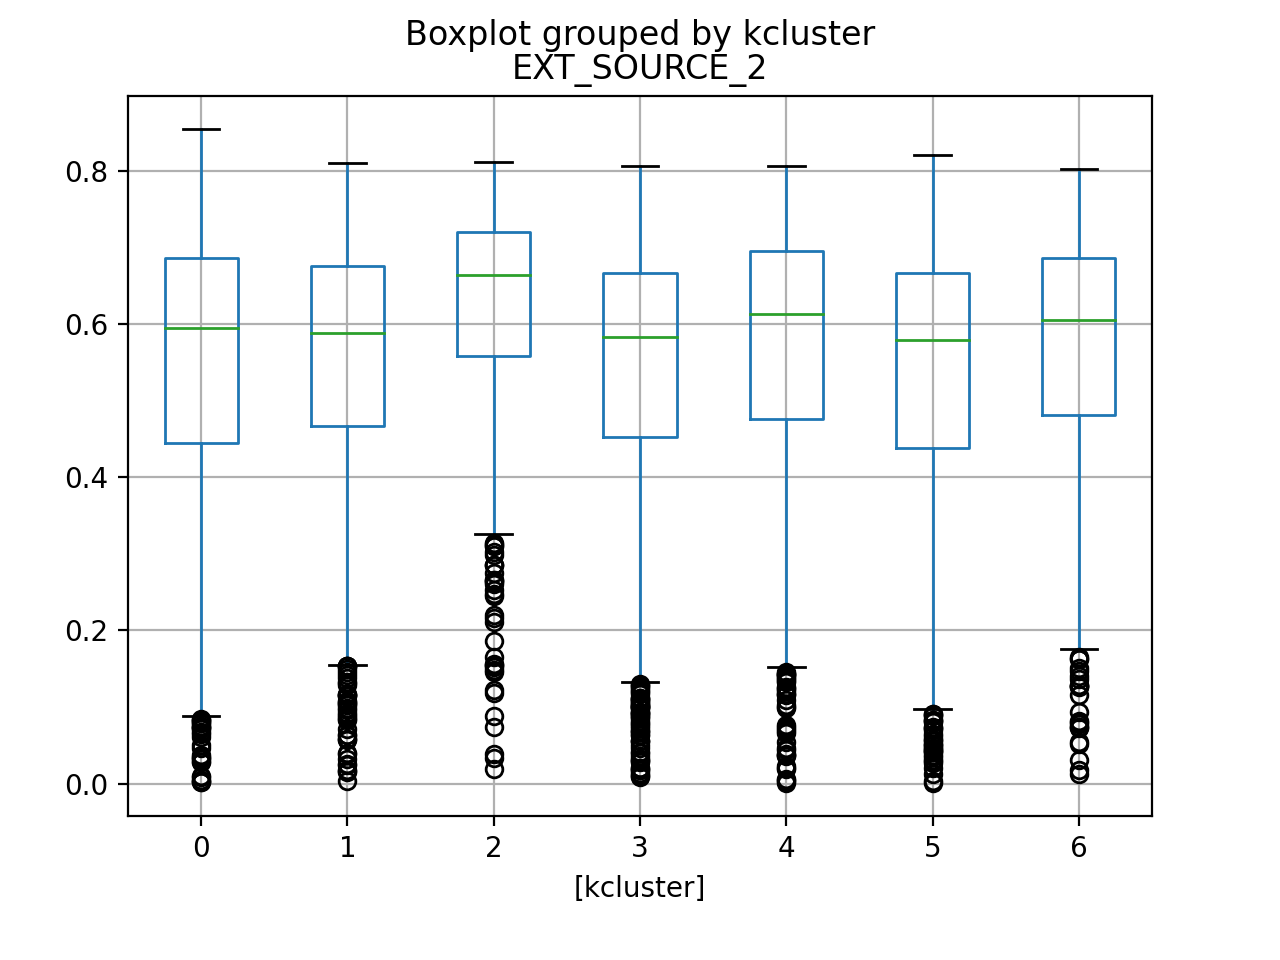

<AxesSubplot:title={'center':'EXT_SOURCE_2'}, xlabel='[kcluster]'>

In [62]:
X_train.boxplot(['EXT_SOURCE_2'], by=['kcluster'])

<IPython.core.display.Javascript object>


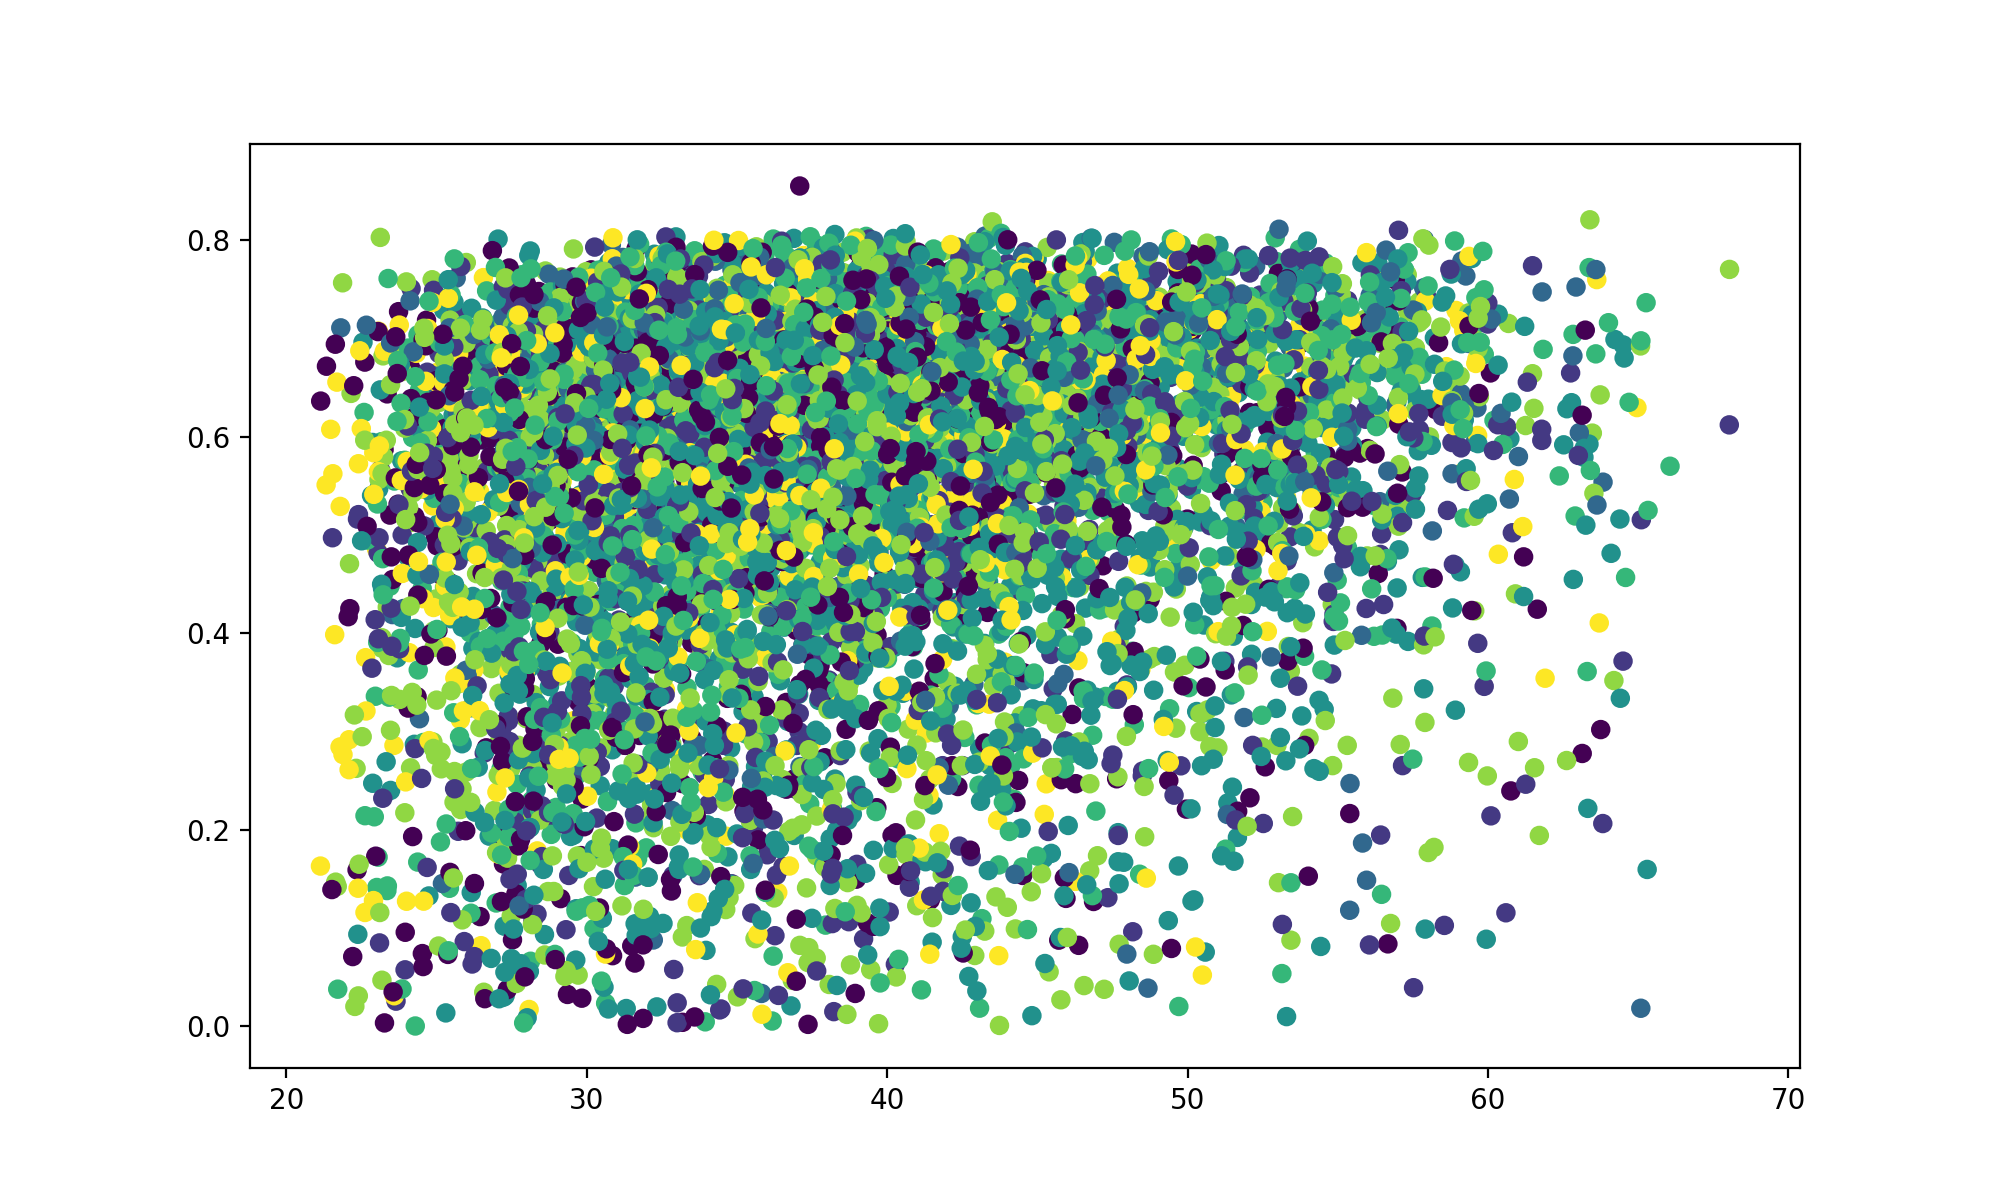

In [63]:
# Visualize the clusters
plt.figure(figsize=(10,6))
plt.scatter(x= X_train['DAYS_BIRTH'], y=X_train['EXT_SOURCE_2'], c = X_train['kcluster'])
plt.show()

### performing kcluster on PCA data

In [64]:
# Predicting clusters with k=7

# Initialize the k-means model
model = KMeans(n_clusters=7, random_state=0)

# Fit the model
model.fit(X_train_scaled)

# Predict clusters
predictions = model.predict(X_train_scaled)

df_pca["class"] = model.labels_
df_pca.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,kclass,class
0,0.257954,-1.525992,-1.548615,-0.068458,0.670567,1.885135,2.599570,-0.703127,0.142199,-0.407641,2,5
1,-1.573347,1.730250,-0.743942,-0.287990,-0.263246,1.289825,1.328066,-1.475894,-0.974776,1.255172,1,3
2,24.055994,-0.114295,1.947566,14.795783,-1.944870,0.370430,-1.500918,-1.388502,-1.245979,-5.534111,2,2
3,8.795450,1.569791,-1.811170,-2.503641,0.032077,0.838397,0.778171,1.076032,2.316590,3.590933,1,2
4,8.090499,-4.210708,1.576563,-0.529943,3.988615,-2.135037,2.252722,0.458013,2.022012,-3.445924,2,2


<IPython.core.display.Javascript object>


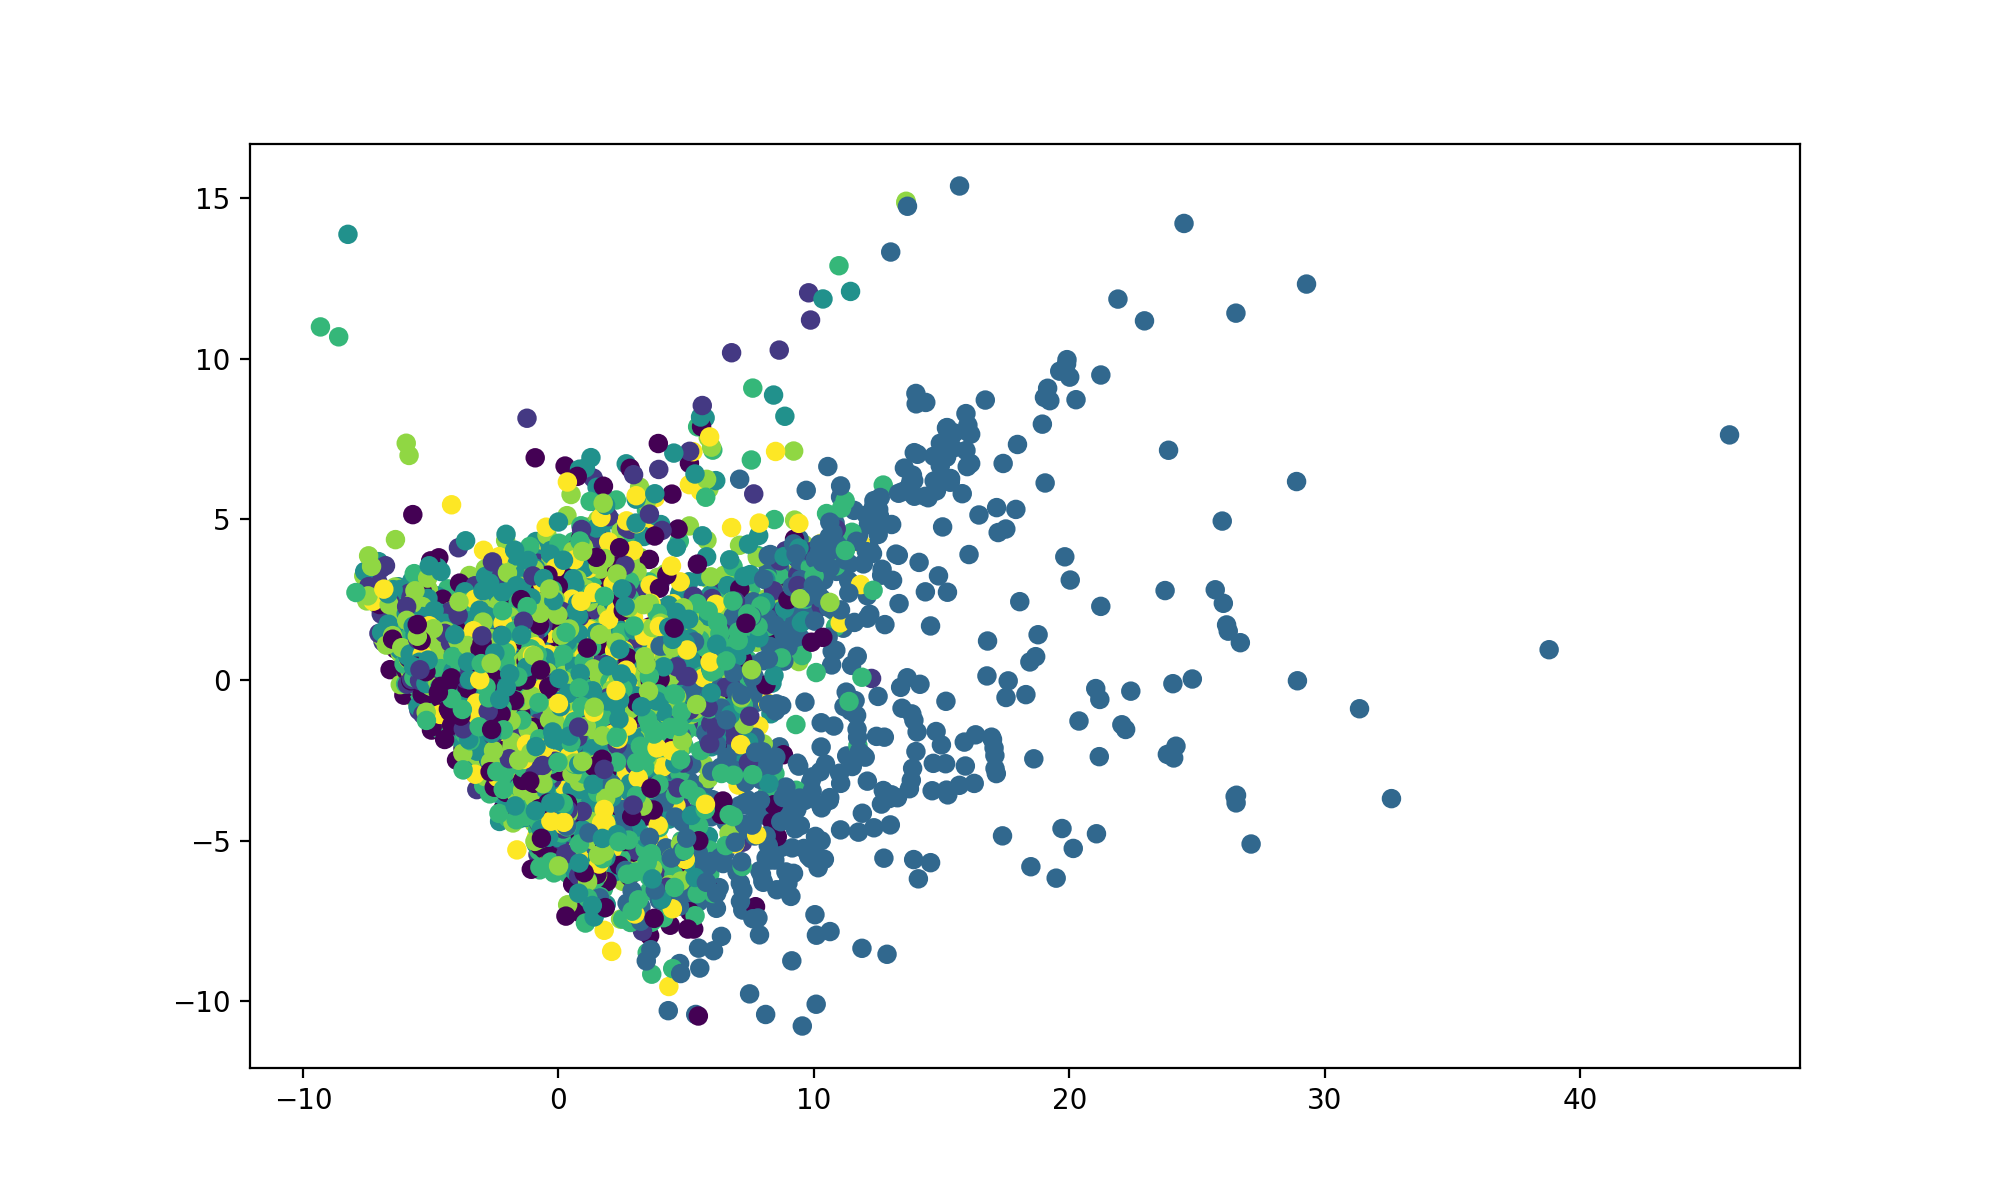

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(x=df_pca['principal component 1'], y=df_pca['principal component 2'], c=df_pca['class'])
plt.show()

    SUMMARY
  PCA virtualization/analysis reveal that this dataset is highly dense. As the dimention could not be reduced to very small amount and still preserved important informationn about the data. To preserve 95% of the features variants , the dimention will have to be reduced to half. i.e from 121 to 60.
    Using Hierarchy clustering to make a cut at 4, Hierarchy clusters of four seems to be the appropriate cut. The braching order here is clustering of features that has close or similar distance together, whereas in CART they are splittted.
    I used elbow curve to detefrrmine the best K value, at k = 7 , the initial begins to stable, thus the choice.
    Lastly, I tried to combined the kclusters with the PCA result of the top ten PCA's to see if the data can be better represented. This showered a better clusters.